<a href="https://colab.research.google.com/github/Melanee-Melanee/OCR/blob/main/alpaca_detection_by_command.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Yolov8 object detection on a custom dataset (Alpaca detection) via command


References:

https://www.youtube.com/watch?v=m9fH9OWn8YM

https://github.com/computervisioneng/train-yolov8-custom-dataset-step-by-step-guide

https://github.com/ultralytics/ultralytics

Annotation tool:

https://www.cvat.ai/

Data:

https://www.kaggle.com/datasets/sid4sal/alpaca-dataset-small

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/gdrive/My Drive/ComputerVisionDeveloper/TrainYolov8CustomDataset/


/content/gdrive/My Drive/ComputerVisionDeveloper/TrainYolov8CustomDataset


In [ ]:
!ls

data  google_colab_config.yaml	runs  TrainYolov8CustomDataset.ipynb  yolov8s.pt


In [ ]:
# Creating our custom yolo model

%cd /content/gdrive/My Drive/ComputerVisionDeveloper/TrainYolov8CustomDataset/

!yolo task=detect mode=train model=yolov8s.pt data= google_colab_config.yaml epochs=5 imgsz=224 plots=True

/content/gdrive/My Drive/ComputerVisionDeveloper/TrainYolov8CustomDataset
100% 21.5M/21.5M [00:00<00:00, 90.3MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=google_colab_config.yaml, epochs=5, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

In [ ]:
!ls runs/detect/train3/weights

best.pt  last.pt


In [ ]:
!pwd

/content/gdrive/MyDrive/ComputerVisionDeveloper/TrainYolov8CustomDataset


In [ ]:
#Inference with Custom Model (inputing our custom image)
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/alpaaa.jpg

2024-06-12 07:43:30.834534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 07:43:30.834587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 07:43:30.883626: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-12 07:43:30.892692: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 07:43:32.309612: W tensorflow/compiler/tf2

# Visualising our detection

In [ ]:
import cv2
from ultralytics import YOLO

# Load the custom YOLOv8 model
model = YOLO('/content/gdrive/MyDrive/ComputerVisionDeveloper/TrainYolov8CustomDataset/runs/detect/train3/weights/best.pt')  # Replace with the path to your trained model

In [ ]:
# Load an image
image_path = '/content/alpaaa.jpg'  # Replace with the path to your custom image
image = cv2.imread(image_path)
# Perform inference
results = model(image)

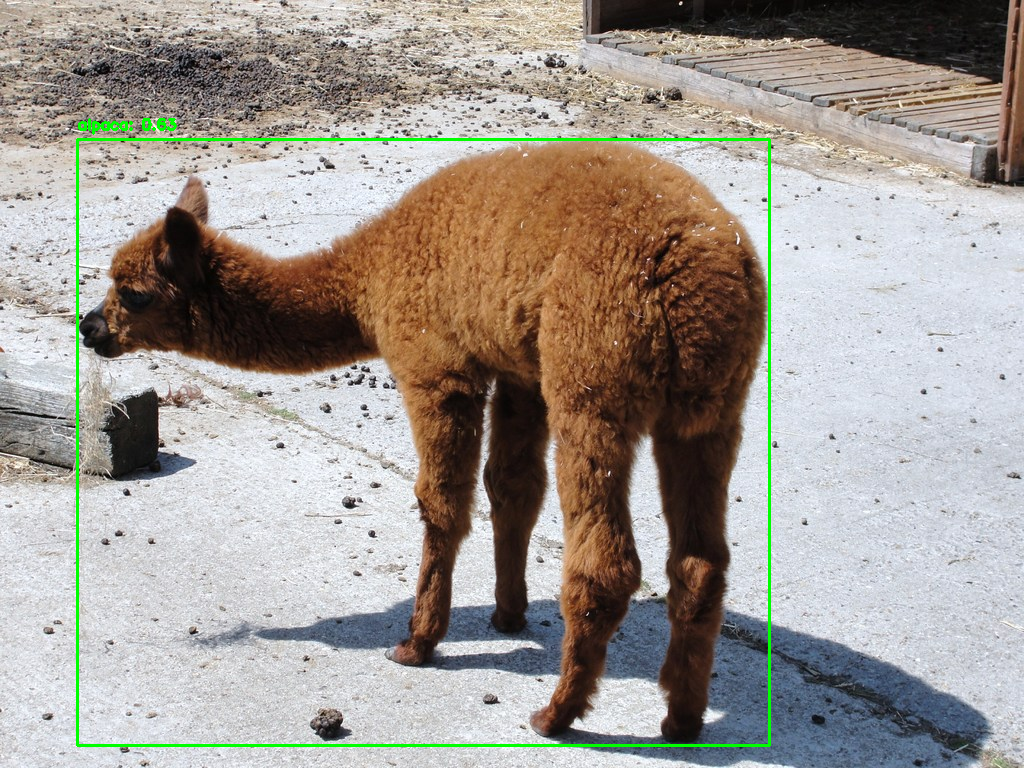

In [ ]:
# Process and visualize results
for result in results:
    boxes = result.boxes.xyxy  # get boxes coordinates in xyxy format
    confidences = result.boxes.conf  # get confidence scores
    classes = result.boxes.cls  # get class IDs

    for box, confidence, cls in zip(boxes, confidences, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f'{model.names[int(cls)]}: {confidence:.2f}'

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the image
from google.colab.patches import cv2_imshow

# After drawing bounding boxes
cv2_imshow(image)